In [1]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
#Tensorflow and Keras and sklearn
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

#Charts
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Time
import time
import datetime

#Performance Plot
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

%matplotlib inline

# fix random seed for reproducibility
seed = 3541
np.random.seed(seed)

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# date_time function

def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:    
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:  
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:  
        return 'Date today: %s' % datetime.date.today()

In [4]:
# Performance Plot

def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()

In [5]:
# Pre-Processing Function

def strip_html_tags(text):
  soup = BeautifulSoup(text, "html.parser")
  [s.extract() for s in soup(['iframe', 'script'])]
  stripped_text = soup.get_text()
  stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
  return stripped_text

def remove_accented_chars(text):
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
  return text

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    doc = strip_html_tags(doc)
    doc = doc.translate(doc.maketrans("\n\t\r", "   "))
    doc = doc.lower()
    doc = remove_accented_chars(doc)
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()  
    norm_docs.append(doc)
  
  return norm_docs

In [6]:
#Reading DAtaset from csv files to Pandas dataframes

dataset_train = pd.read_csv('train_text_classification.csv')
dataset_test = pd.read_csv('test_text_classification.csv')

In [7]:
dataset_train

,class_index,review_text
0,4,well-done film
1,1,characters ramble
2,3,the intensity that made her an interesting cha...
3,1,'s not really funny
4,2,stuffs
...,...,...
100688,1,tired old
100689,3,mostly admirable
100690,2,Chris Columbus ' sequel
100691,1,dramatized PBS program


In [8]:
dataset_train.isnull().sum()

class_index    0
review_text    0
dtype: int64

In [9]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100693 entries, 0 to 100692
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   class_index  100693 non-null  int64 
 1   review_text  100693 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [10]:
dataset_test

,class_index,review_text
0,2,at the right time in the history of our country
1,3,of the best silly horror movies
2,2,of tragedies
3,2,a glass
4,2,the fly -- like between lunch breaks for Shear...
...,...,...
25169,3,what gives Human Nature its unique feel
25170,2,their heads
25171,2,the inevitable conflicts between human urges a...
25172,2,sense and sensibility


In [11]:
dataset_test.isnull().sum()

class_index    0
review_text    0
dtype: int64

In [12]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25174 entries, 0 to 25173
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  25174 non-null  int64 
 1   review_text  25174 non-null  object
dtypes: int64(1), object(1)
memory usage: 393.5+ KB


In [13]:
# Shuffling Data

train = dataset_train.sample(frac=1)
test = dataset_test.sample(frac=1)



In [14]:
train.shape

(100693, 2)

In [15]:
test.shape

(25174, 2)

In [16]:
# Taking only a small piece of the dataset to avoid long training time
test = dataset_test.iloc[:25000, :]
val = dataset_train.iloc[:50000, :]
train = dataset_train.iloc[50000:100000, :]

In [17]:
train

,class_index,review_text
50000,1,was a dark and stormy night
50001,2,the cutthroat world of children 's television
50002,0,years and years of costly analysis could never...
50003,2,glancing
50004,2,rote exercise
...,...,...
99995,2,of mythologizing
99996,2,Miramax chief
99997,2,find their own rhythm and
99998,1,numbing experience


In [18]:
test

,class_index,review_text
0,2,at the right time in the history of our country
1,3,of the best silly horror movies
2,2,of tragedies
3,2,a glass
4,2,the fly -- like between lunch breaks for Shear...
...,...,...
24995,1,becoming mired in sentimentality
24996,2,or detached pleasure
24997,0,repugnant
24998,2,post-adolescent


In [19]:
val

,class_index,review_text
0,4,well-done film
1,1,characters ramble
2,3,the intensity that made her an interesting cha...
3,1,'s not really funny
4,2,stuffs
...,...,...
49995,2,reminds us
49996,2,The urban landscapes
49997,2,is obviously
49998,2,into their own pseudo-witty copycat interpreta...


In [20]:
# Splitting data to train and validation sets manually, only including neccessary columns

X_train = train['review_text'].values
y_train = train['class_index'].values

X_val = val['review_text'].values
y_val = val['class_index'].values

X_test = test['review_text'].values
y_test = test['class_index'].values


In [21]:
X_train

array(['was a dark and stormy night',
       "the cutthroat world of children 's television",
       'years and years of costly analysis could never fix', ...,
       'find their own rhythm and', 'numbing experience', 'utterly'],
      dtype=object)

In [22]:
y_train

array([1, 2, 0, ..., 2, 1, 2], dtype=int64)

In [23]:
%%time
#Pre-processing the Data (the Reviews)

X_train = pre_process_corpus(X_train)
X_val = pre_process_corpus(X_val)
X_test = pre_process_corpus(X_test)

  0%|                                                                                        | 0/50000 [00:00<?, ?it/s]C:\Users\himan\AppData\Local\Temp\ipykernel_3320\3037751630.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")
100%|██████████████████████████████████████████████████████████████████████████| 25000/25000 [00:03<00:00, 8117.03it/s]

CPU times: total: 7.52 s
Wall time: 16.5 s


In [24]:
# Tokenazing the Data (the Reviews)

t = Tokenizer(oov_token='<UNK>')
# fit the tokenizer on train documents
t.fit_on_texts(X_train)
t.word_index['<PAD>'] = 0

In [25]:
t

In [26]:
# Transforming Reviews to Sequences

X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)
X_val = t.texts_to_sequences(X_val)

In [27]:
X_train

[[86, 3, 256, 5, 8708, 540],
 [2, 5901, 125, 4, 266, 7, 800],
 [192, 5, 192, 4, 3050, 3815, 101, 113, 2554],
 [12988],
 [1926, 310],
 [9, 10714, 1249],
 [579, 197],
 [9, 5902, 1927],
 [1017, 5, 72],
 [9, 3, 142, 741, 4, 158],
 [2, 179, 4, 2, 303],
 [49, 64, 72, 5, 198, 107],
 [3, 65, 34, 19],
 [3,
  443,
  509,
  129,
  23,
  3,
  1450,
  49,
  1377,
  6,
  27,
  1211,
  7,
  607,
  176,
  1043,
  315],
 [65, 5],
 [52,
  1212,
  12,
  3,
  912,
  180,
  8709,
  46,
  3,
  3410,
  3816,
  1320,
  21,
  8710,
  1157,
  4312],
 [3, 7133, 215, 4, 510, 5903],
 [2, 10715],
 [3051],
 [7, 36, 76, 185],
 [44, 1713],
 [2797, 8711, 7, 1533, 7134, 2193, 5, 1250, 5904, 7, 541, 272],
 [164, 1158, 21, 1251],
 [1076,
  30,
  15,
  3817,
  7135,
  4,
  2,
  4990,
  693,
  4,
  5905,
  267,
  6,
  10716,
  5906,
  8,
  48,
  719,
  14,
  48,
  2194],
 [288, 17, 1116, 77, 3411, 8, 4313, 3818],
 [96, 7136, 10717, 5907],
 [3,
  5908,
  257,
  4,
  2358,
  5,
  542,
  219,
  5909,
  580,
  34,
  89,
  7,
  

In [28]:
len(X_train[0])

6

In [29]:
X_test

[[32, 2, 189, 53, 8, 2, 260, 4, 146, 592],
 [4, 2, 91, 336, 286, 72],
 [4, 1219],
 [3, 1392],
 [2, 2521, 34, 152, 2998, 2522, 13, 5510, 7, 6519, 237],
 [14844, 766, 2159, 844, 2, 3386],
 [14, 2, 12106, 5122],
 [9, 1013, 5002, 12, 2, 2428, 1065, 930, 3, 1164, 2785],
 [1315, 13, 1756, 59, 159, 50, 390, 43, 11396],
 [60, 1480],
 [10455, 196, 8, 2, 7417, 4, 3, 256, 5, 502, 60],
 [274, 23, 6513, 35, 263],
 [1],
 [1703, 7, 42],
 [6324],
 [6, 354, 31, 8291, 476, 176, 122],
 [28, 8, 2, 304],
 [67, 729, 13883],
 [11090, 24, 95, 25, 28, 783, 3897],
 [2, 160, 273, 774, 181, 28, 3232],
 [1760, 7, 7290],
 [8861, 7, 14534, 9528],
 [14709, 24, 15, 3479],
 [127, 2130, 6, 51, 4, 3, 40],
 [87, 55, 487],
 [2, 2506, 5, 7203],
 [10, 24, 2, 179],
 [4915, 5, 2696],
 [13982, 139],
 [4904, 2, 4846, 1990, 567, 11619, 38],
 [10449],
 [8399, 5],
 [2, 13967, 585, 12261],
 [157, 218],
 [6, 255, 83, 5, 449],
 [1399],
 [7, 3, 14039, 36, 217, 4612],
 [14, 3, 12612, 1595],
 [13396, 3496, 9, 3, 462],
 [3490, 2133],
 [17

In [30]:
len(X_test[0])

10

In [31]:
X_val

[[7899, 16],
 [58, 1],
 [2, 1088, 10, 92, 88, 17, 185, 116, 6, 2567, 14],
 [7, 36, 145, 85],
 [14052],
 [2115, 8, 2, 40, 4, 3160, 5552],
 [7, 3, 690, 353, 2, 103, 9, 2295, 5, 2, 6771, 430, 8010],
 [4, 1083, 2371, 5, 5025, 7177, 6, 2071, 159, 45],
 [3739, 188],
 [156, 4, 386, 8, 1037],
 [1424, 12, 2, 2874, 4, 2, 3275],
 [9, 12, 10055, 12, 69, 60],
 [66, 106, 143, 3969, 21, 2, 981, 2478],
 [4, 2, 177],
 [1715, 1347],
 [86, 1034],
 [7153, 5],
 [3413, 53],
 [11844],
 [1],
 [7594, 625, 8, 19, 429, 5, 402, 16],
 [6, 64, 72],
 [166, 11, 378, 369, 47, 1619],
 [3952, 3953],
 [171],
 [10, 209, 30, 5099, 5, 350, 30, 2603, 57, 2604, 133, 317],
 [1628, 3395, 3107],
 [8, 39, 87, 1143, 380],
 [13092],
 [12653, 5061, 12, 2, 12672, 8888, 5],
 [32, 2844, 118],
 [668, 4927, 1361],
 [8859],
 [596, 3800],
 [10, 9, 468, 6, 252, 23, 5, 9, 26, 76, 85],
 [101, 335, 23, 5414],
 [3, 2093, 819, 154, 129, 10, 1514, 2187, 8, 936, 148],
 [114, 752],
 [3, 14153, 5, 14834, 4916, 161, 3735],
 [52, 14, 35, 2, 3035, 7009

In [32]:
# Calculating the Vocabulary Size and the number of Reviews

print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Reviews={}".format(t.document_count))

Vocabulary size=15287
Number of Reviews=50000


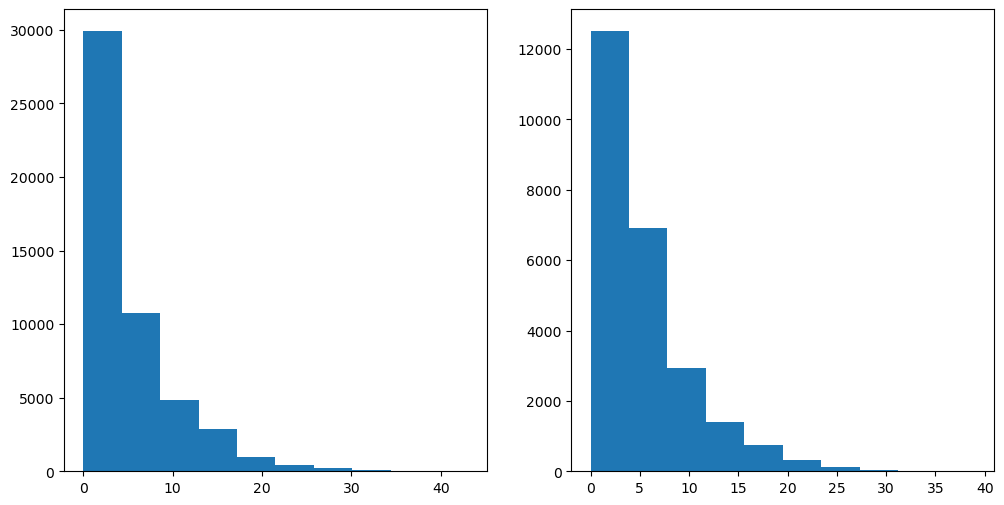

In [33]:
# Plotting the size of the sequences

import matplotlib.pyplot as plt
%matplotlib inline

train_lens = [len(s) for s in X_train]
test_lens = [len(s) for s in X_test]

fig, ax = plt.subplots(1,2, figsize=(12, 6))
h1 = ax[0].hist(train_lens)
h2 = ax[1].hist(test_lens)

In [34]:
# Padding the dataset to a maximum review length in words

MAX_SEQUENCE_LENGTH = 120

X_train = sequence.pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
X_val = sequence.pad_sequences(X_val, maxlen=MAX_SEQUENCE_LENGTH)

In [35]:
len(X_train[0])


120

In [36]:
len(X_test[0])

120

In [37]:
len(X_val[0])

120

In [38]:
# Encoding Labels

le = LabelEncoder()
num_classes=5 # Very Bad -> -2, Bad -> -1, Neutral -> 0 , Good -> 1, Very Good -> 2

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [39]:
y_train

array([1, 2, 0, ..., 2, 1, 2], dtype=int64)

In [40]:
y_test

array([2, 3, 2, ..., 0, 2, 2], dtype=int64)

In [41]:
y_val

array([4, 1, 3, ..., 2, 2, 3], dtype=int64)

In [42]:
# Setting Vocabulary size and Emmbedding size

VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 120

# Setting an Early_stopping callback to monitor accuracy with a patience degree of 2

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=2)

In [43]:
# Creating the model

model = Sequential()
# The Embedding layer
model.add(Embedding(VOCAB_SIZE, EMBED_SIZE, input_length=MAX_SEQUENCE_LENGTH))
# The first one dimensional convolutional layer (32,4,same,relu)
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
# The first Max pooling layer (2)
model.add(MaxPooling1D(pool_size=2))
# The first Dropout layer (10%)
model.add(Dropout(rate=0.20))
# The second one dimensional convolutional layer (32,4,same,relu)
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
# The second Max pooling layer (2)
model.add(MaxPooling1D(pool_size=2))
# The second Dropout layer (10%)
model.add(Dropout(rate=0.20))
# The third one dimensional convolutional layer (32,4,same,relu)
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
# The third Max pooling layer (2)

model.add(MaxPooling1D(pool_size=2))
# The third Dropout layer (10%)
model.add(Dropout(rate=0.20))

# The fourth one dimensional convolutional layer (32,4,same,relu)
model.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
# The third Max pooling layer (2)

model.add(MaxPooling1D(pool_size=2))
# The third Dropout layer (10%)
model.add(Dropout(rate=0.20))

# The Flattening layer
model.add(Flatten())
# The First Dense Layer (256,relu)
model.add(Dense(256, activation='relu'))
# The Second Dense Layer or Prediction layer (1,sigmoid)
model.add(Dense(5, activation='softmax'))
# Compiling the Model using the Binary_Crossontropy as a loss function and accuracy as a meseaure and Adam as an Optimizer
model.compile(loss='SparseCategoricalCrossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
# Displaying the Model Schema
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 120)          1834440   
                                                                 
 conv1d (Conv1D)             (None, 120, 32)           15392     
                                                                 
 conv1d_1 (Conv1D)           (None, 120, 32)           4128      
                                                                 
 max_pooling1d (MaxPooling1  (None, 60, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 60, 32)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 60, 64)            8256      
                                                      

In [44]:
# Training the Model with GPU
with tf.device('/GPU:0'):
    history1 = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=30, batch_size=64, verbose=1, callbacks=[callback])

Epoch 1/30


782/782 [==============================] - 113s 138ms/step - loss: 1.1597 - accuracy: 0.5562 - val_loss: 1.1010 - val_accuracy: 0.5627
Epoch 2/30
782/782 [==============================] - 50s 64ms/step - loss: 1.0125 - accuracy: 0.5937 - val_loss: 1.0436 - val_accuracy: 0.5862
Epoch 3/30
782/782 [==============================] - 65s 83ms/step - loss: 0.9020 - accuracy: 0.6347 - val_loss: 1.0319 - val_accuracy: 0.5970
Epoch 4/30
782/782 [==============================] - 71s 91ms/step - loss: 0.8169 - accuracy: 0.6744 - val_loss: 1.0445 - val_accuracy: 0.6041
Epoch 5/30
782/782 [==============================] - 70s 90ms/step - loss: 0.7415 - accuracy: 0.7083 - val_loss: 1.0867 - val_accuracy: 0.5925
Epoch 6/30
782/782 [==============================] - 71s 91ms/step - loss: 0.6809 - accuracy: 0.7360 - val_loss: 1.0791 - val_accuracy: 0.5972
Epoch 7/30
782/782 [==============================] - 69s 88ms/step - loss: 0.6270 - accuracy: 0.7603 - val_loss: 1.1359 - val_accur

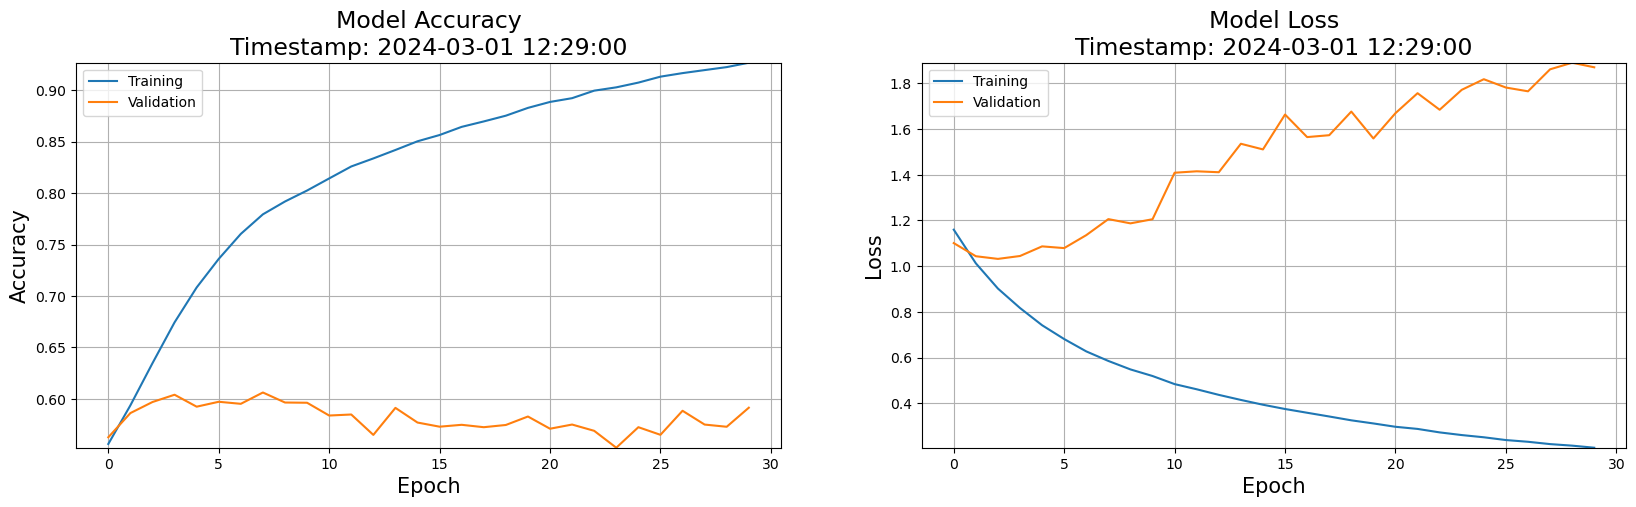

In [45]:
plot_performance(history=history1)


In [46]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

782/782 [==============================] - 42s 52ms/step - loss: 1.8863 - accuracy: 0.5943
Accuracy: 59.43%


In [47]:
model.save('5_Classes_Classification_Movie_Reviews_CNN.h5')


C:\Users\himan\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
